In [581]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [582]:
print os.listdir(".")

['.DS_Store', '.ipynb_checkpoints', '10.jpg', '1246429776.57.jpg', '1246431088.03.jpg', '1246431174.01.jpg', '1246431343.25.jpg', '1246431366.97.jpg', '1246431382.69.jpg', '1246431420.91.jpg', '1246431434.52.jpg', '1246435066.32.jpg', '1246435083.12.jpg', 'Archive.zip', 'convexHull.ipynb', 'houghline.ipynb', 'vision.ipynb']


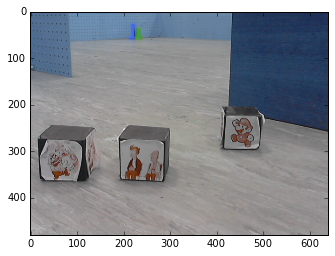

In [583]:
img = cv2.imread('1246431420.91.jpg')
# print img
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [584]:
def displayImg(img):
    img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.show()

In [585]:
def bb(img):
#     img = cv2.resize(img,(500,500))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_OTSU)
    contours,hier = cv2.findContours(thresh,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    for cnt in contours:
        if cv2.contourArea(cnt) > 1000 and cv2.contourArea(cnt) < 10000:  # remove small areas like noise etc
            hull = cv2.convexHull(cnt)    # find the convex hull of contour
            hull = cv2.approxPolyDP(hull,0.1*cv2.arcLength(hull,True),True)
            if len(hull)==4:
#                 cv2.drawContours(img,[hull],0,(0,255,0),2)
                rect = cv2.minAreaRect(cnt)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
#                 img = cv2.drawContours(img,[box],0,(0,0,255),2)
                x,y,w,h = cv2.boundingRect(cnt)
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                displayImg(img[y:y+h,x:x+w]) 
        

    plt.imshow(img)
    plt.show()

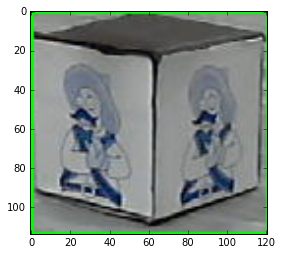

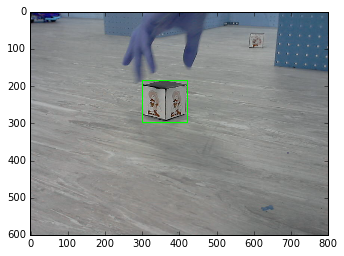

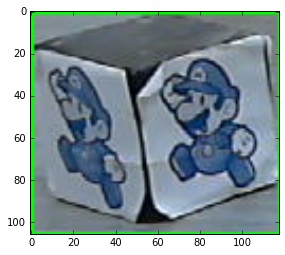

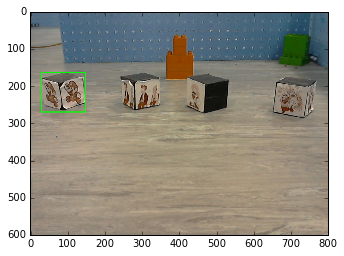

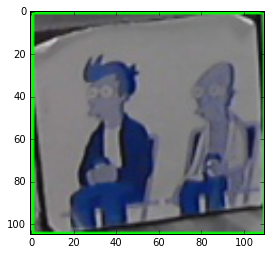

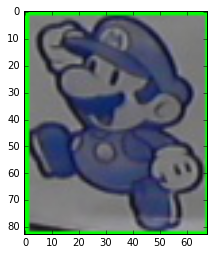

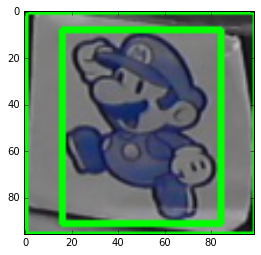

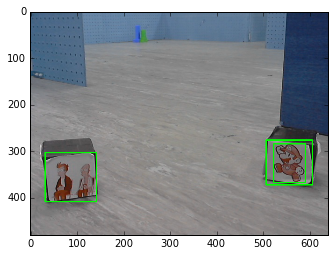

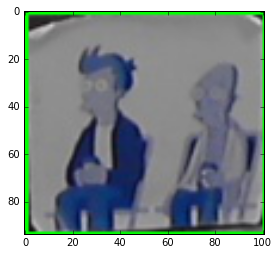

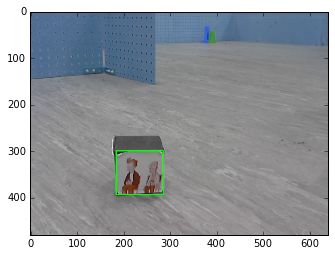

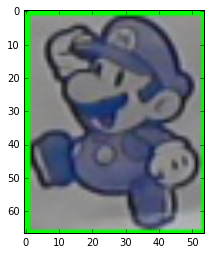

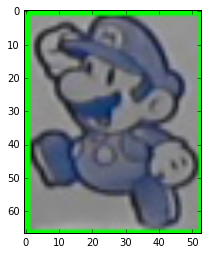

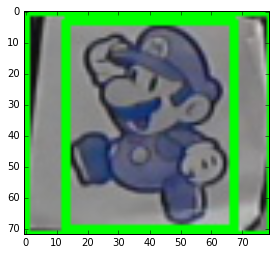

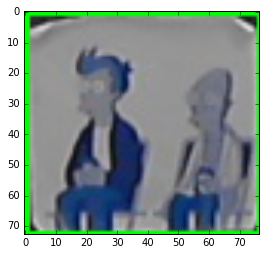

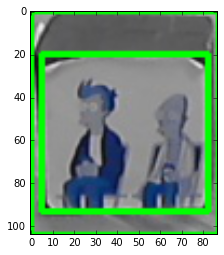

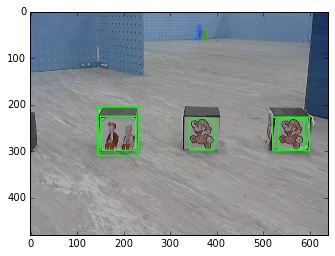

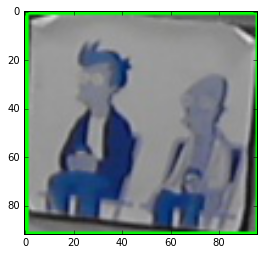

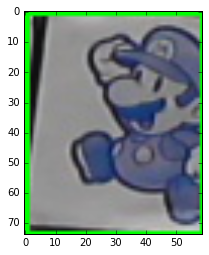

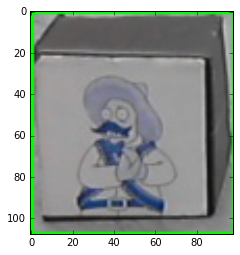

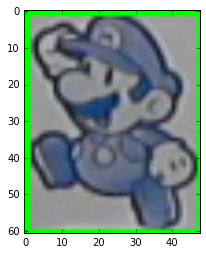

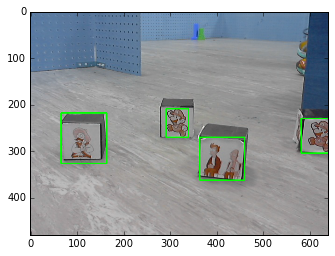

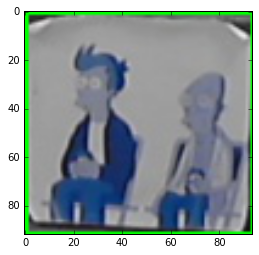

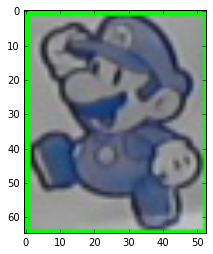

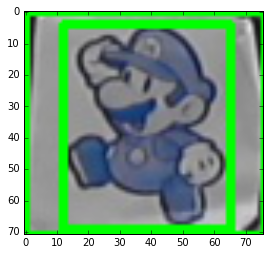

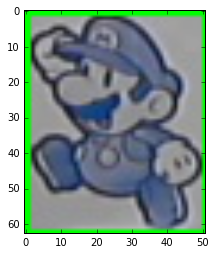

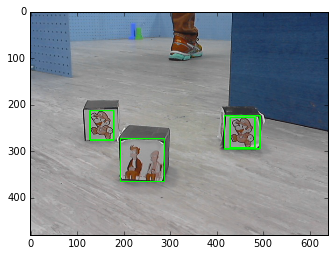

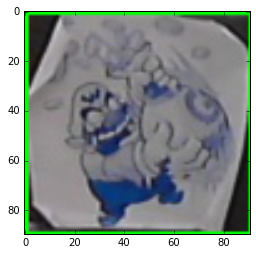

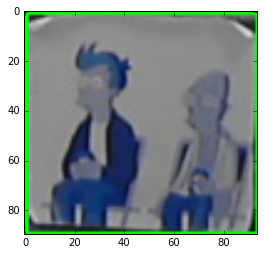

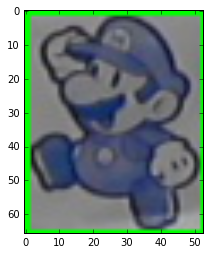

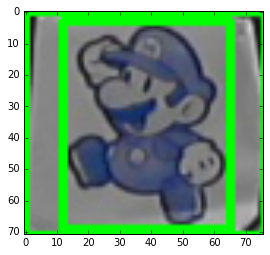

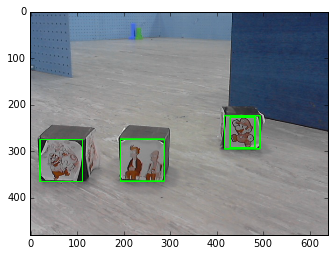

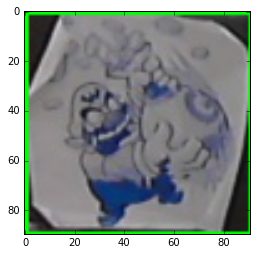

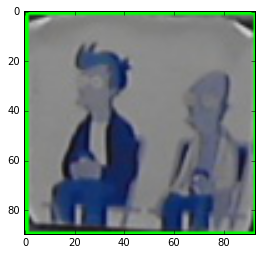

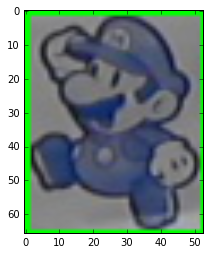

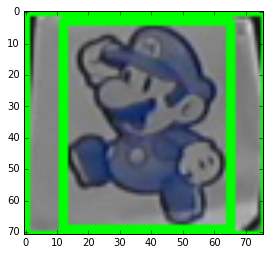

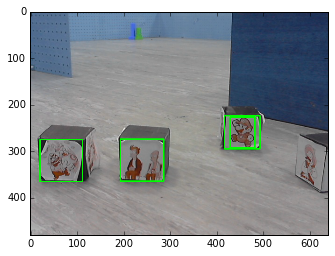

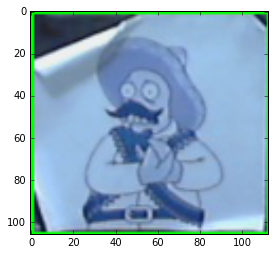

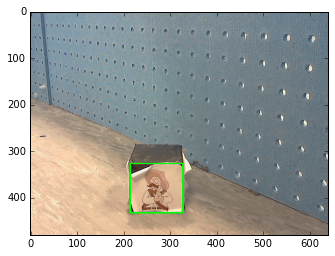

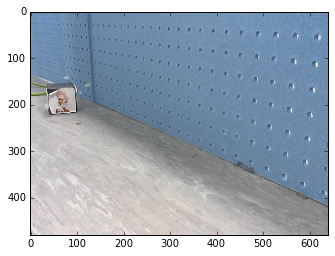

In [586]:
for path in os.listdir("."):
    if("jpg" in path):
        bb(cv2.imread(path))